# Unit 5
## 이미지 인식의 꽃, CNN 익히기
- MNIST 손글씨 인식

trainset 이미지 수 : 60000
testset 이미지 수 : 10000


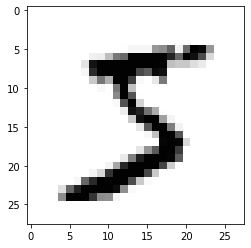

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST dataset 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(f'trainset 이미지 수 : {X_train.shape[0]}')
print(f'testset 이미지 수 : {X_test.shape[0]}')

# graph
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# code
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# dimension trans.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train/255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

# class
print('class : %d' % (Y_class_train[0]))

# binary
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])


Epoch 00001: saving model to ./model/01-0.1474.hdf5

Epoch 00002: saving model to ./model/02-0.1019.hdf5

Epoch 00003: saving model to ./model/03-0.0890.hdf5

Epoch 00004: saving model to ./model/04-0.0784.hdf5

Epoch 00005: saving model to ./model/05-0.0745.hdf5

Epoch 00006: saving model to ./model/06-0.0665.hdf5

Epoch 00007: saving model to ./model/07-0.0652.hdf5

Epoch 00008: saving model to ./model/08-0.0629.hdf5

Epoch 00009: saving model to ./model/09-0.0632.hdf5

Epoch 00010: saving model to ./model/10-0.0622.hdf5

Epoch 00011: saving model to ./model/11-0.0655.hdf5

Epoch 00012: saving model to ./model/12-0.0678.hdf5

Epoch 00013: saving model to ./model/13-0.0592.hdf5

Epoch 00014: saving model to ./model/14-0.0656.hdf5

Epoch 00015: saving model to ./model/15-0.0648.hdf5

Epoch 00016: saving model to ./model/16-0.0697.hdf5

Epoch 00017: saving model to ./model/17-0.0683.hdf5

Epoch 00018: saving model to ./model/18-0.0870.hdf5

Epoch 00019: saving model to ./model/19-0.075

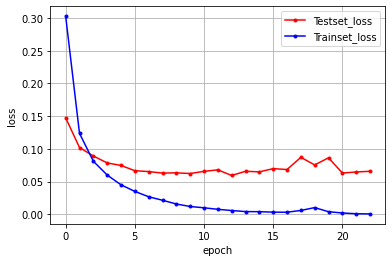

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST dataset 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# dimension trans.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

# binary
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

# model
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

# model optimization setting
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_beset_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# train model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# test accuracy
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# graph
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN

11501568/11490434 [==============================] - 0s 0us/step

Epoch 00001: saving model to ./model/01-0.0529.hdf5

Epoch 00002: saving model to ./model/02-0.0383.hdf5

Epoch 00003: saving model to ./model/03-0.0350.hdf5

Epoch 00004: saving model to ./model/04-0.0304.hdf5

Epoch 00005: saving model to ./model/05-0.0291.hdf5

Epoch 00006: saving model to ./model/06-0.0295.hdf5

Epoch 00007: saving model to ./model/07-0.0306.hdf5

Epoch 00008: saving model to ./model/08-0.0295.hdf5

Epoch 00009: saving model to ./model/09-0.0261.hdf5

Epoch 00010: saving model to ./model/10-0.0294.hdf5

Epoch 00011: saving model to ./model/11-0.0263.hdf5

Epoch 00012: saving model to ./model/12-0.0284.hdf5

Epoch 00013: saving model to ./model/13-0.0265.hdf5

Epoch 00014: saving model to ./model/14-0.0255.hdf5

Epoch 00015: saving model to ./model/15-0.0347.hdf5

Epoch 00016: saving model to ./model/16-0.0269.hdf5

Epoch 00017: saving model to ./model/17-0.0279.hdf5

Epoch 00018: saving model to ./mo

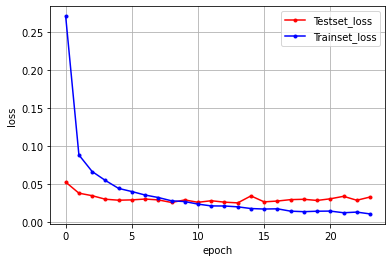

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST dataset 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# dimension trans.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

# binary
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

# model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

# model optimization setting
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_beset_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# train model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# test accuracy
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# graph
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()